# Gurmukhi Handwritten Digit Classification

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [96]:
train_path = 'C:\\Users\\sumit\\Desktop\\Machine Learning Assignment\\Assignment-Fractal3\\Gurmukhi Handwritten Digit Classification\\train' 
val_path = 'C:\\Users\\sumit\\Desktop\\Machine Learning Assignment\\Assignment-Fractal3\\Gurmukhi Handwritten Digit Classification\\val'

In [97]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path

# Set the image size
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
# Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
# Load the image and resize it to the desired size 
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img, img_size)
# Append the image and label to the lists
            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images) 
np.save('y_train.npy', labels)

In [98]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path

# Set the image size
img_size_val = (32, 32)

# Create empty lists for the images and labels
images_val = [] 
labels_val = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val\\', str(label))

# Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
# Load the image and resize it to the desired size 
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img, img_size_val)
# Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays 
images_val = np.array(images_val) 
labels_val = np.array(labels_val)

# Save the arrays in NumPy format 
np.save('x_test.npy', images_val) 
np.save('y_test.npy', labels_val)

In [99]:
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


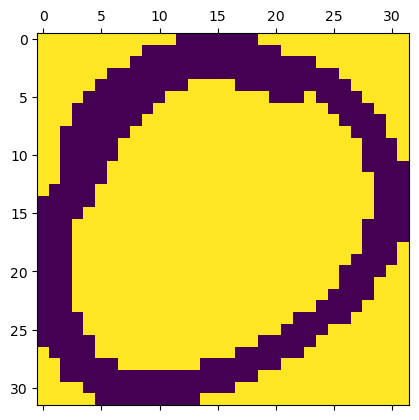

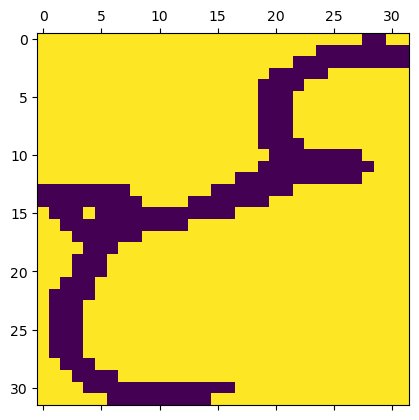

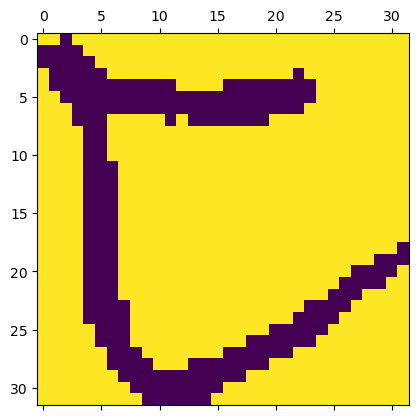

In [100]:
print(len(x_train)) 
print(len(x_test)) 
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999]) 
print(x_train.shape)
print(x_test.shape) 
y_train
y_test
plt.matshow(x_test[150])

In [101]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])

# compile the nn
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))
    

Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 157.8882 - accuracy: 0.3570 - val_loss: 75.6541 - val_accuracy: 0.5112
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 27.3724 - accuracy: 0.7860 - val_loss: 35.1852 - val_accuracy: 0.7247
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 16.4527 - accuracy: 0.8640 - val_loss: 33.7266 - val_accuracy: 0.7416
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 11.1859 - accuracy: 0.8970 - val_loss: 18.5904 - val_accuracy: 0.8258
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 8.4954 - accuracy: 0.9070 - val_loss: 29.9544 - val_accuracy: 0.7809
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 5.2193 - accuracy: 0.9360 - val_loss: 15.8450 - val_accuracy: 0.8708
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 2.5148 - accuracy: 0.9510 - val_loss: 19.2280 - val_accuracy: 0.8483
Epoch 8/

In [102]:
# now scale and try to check the accuracy, divide dataset by 255

x_train_scaled = x_train/255 
x_test_scaled = x_test/255

model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.7159 - accuracy: 0.9140 - val_loss: 0.9847 - val_accuracy: 0.7978
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.9060 - val_loss: 0.9525 - val_accuracy: 0.8258
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.9300 - val_loss: 0.9242 - val_accuracy: 0.8652
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.9480 - val_loss: 0.9045 - val_accuracy: 0.8820
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.9680 - val_loss: 0.8908 - val_accuracy: 0.9045
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.9780 - val_loss: 0.8806 - val_accuracy: 0.9157
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.9810 - val_loss: 0.8729 - val_accuracy: 0.9213
Epoch 8/10
32/32 [==

In [103]:
# evaluate test dataset

model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.9157


[0.8541526198387146, 0.915730357170105]

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


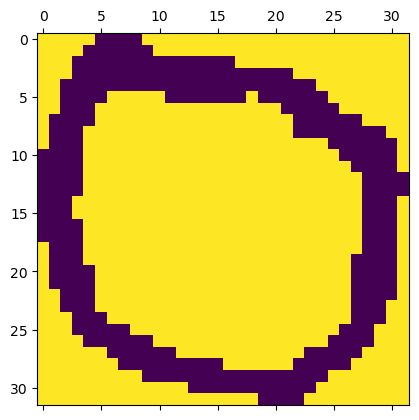

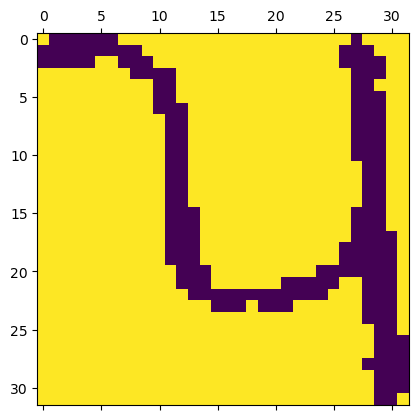

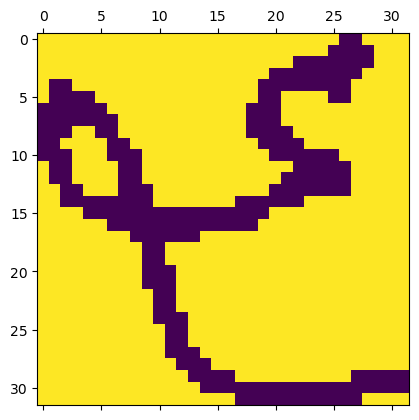

In [104]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))

# test some more values

plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))

plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [105]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like # convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted] 
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 7, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0, 12,  1,  2,  0,  0,  1,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

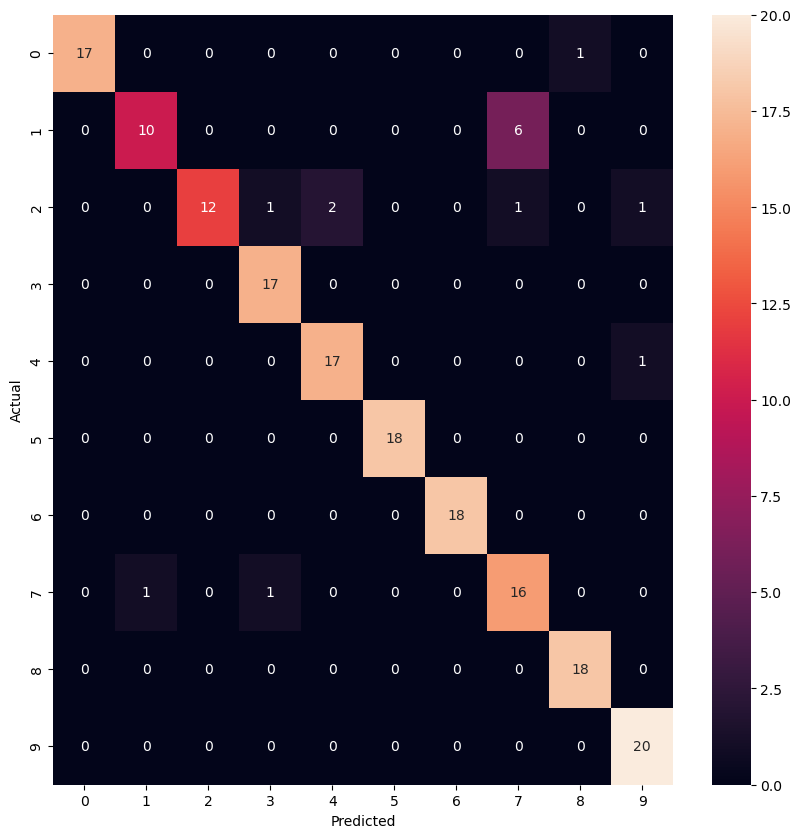

In [106]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [107]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9) # 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy

model2 = keras.Sequential([ keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(1024,), activation='relu'), keras.layers.Dense(10, activation='softmax')
])

# compile the nn
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy']
)
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 1.5364 - accuracy: 0.6290 - val_loss: 0.5122 - val_accuracy: 0.8427
Epoch 2/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2075 - accuracy: 0.9370 - val_loss: 0.3101 - val_accuracy: 0.9213
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 0.1237 - accuracy: 0.9620 - val_loss: 0.2496 - val_accuracy: 0.9101
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0918 - accuracy: 0.9720 - val_loss: 0.2012 - val_accuracy: 0.9494
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0909 - accuracy: 0.9730 - val_loss: 0.2327 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.2184 - val_accuracy: 0.9270
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9970 - val_loss: 0.1859 - val_accuracy: 0.9494
Epoch 8/10
32/32 [

In [108]:
# Observation : due to multiple layers the compiling will take more time to execute # we also got amazing accuracy than earlier

# evaluate test dataset on modified model

model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9494


[0.17030522227287292, 0.949438214302063]

In [109]:
# Earlier we got  0.9213483333587646 now we got 0.9606741666793823 accuracy
# redo the confusion matrix

# build confusion matrix to see how our prediction looks like # convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]

y_predicted_labels=[np.argmax(i) for i in y_predicted] 
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

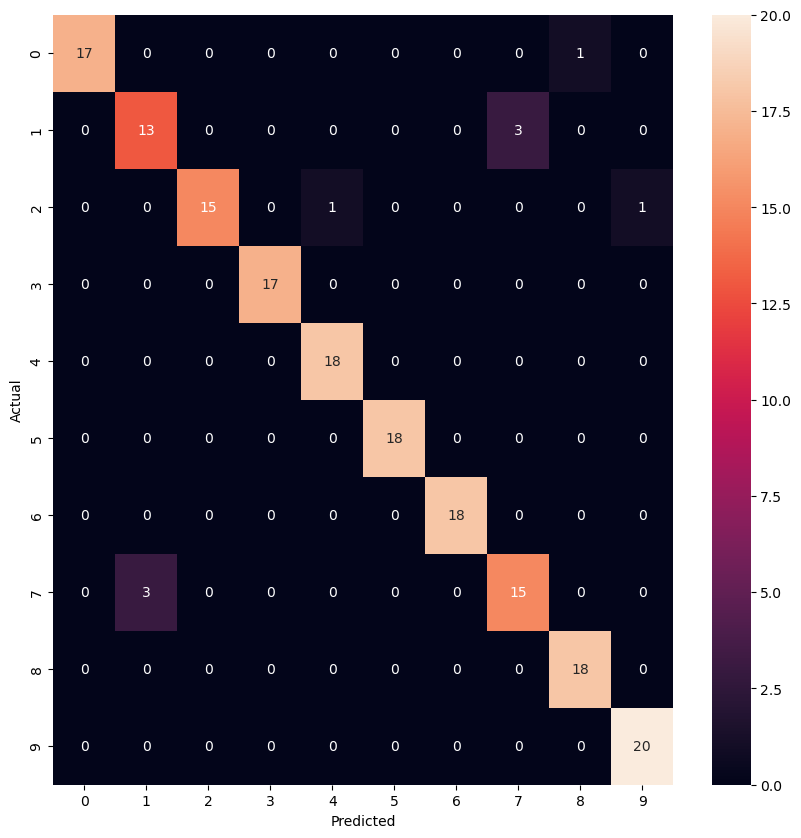

In [110]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d') 
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 2ms/step - loss: 20.8434 - accuracy: 0.9045
Test accuracy: 0.9044944047927856


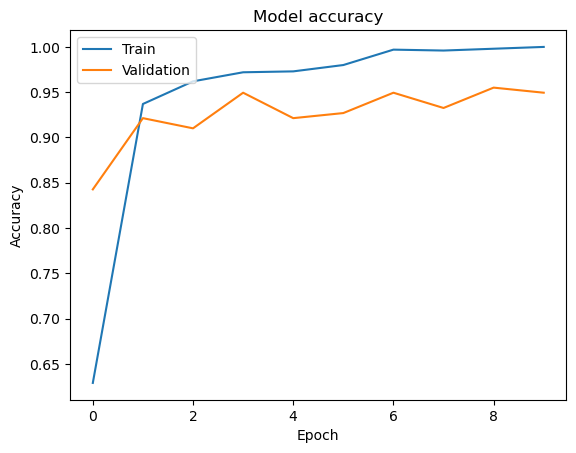

In [111]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test) 
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()